<a href="https://colab.research.google.com/github/Bkoome/Backward-Geocoding/blob/main/Quiz1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:

try:
    df = pd.read_csv('Name.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/zu-math/SIA-Fall-2023-Dataset/main/heart_2020_cleaned.csv")
    df = original_data.sample(300, random_state=42)
    df.to_csv('Name.csv', index=False)

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,No,27.63,Yes,No,No,0.0,25.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
270361,No,21.95,No,No,No,0.0,20.0,No,Female,30-34,White,No,Yes,Excellent,6.0,No,No,Yes
219060,No,31.32,Yes,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,6.0,Yes,No,No
24010,No,40.35,No,No,No,30.0,0.0,No,Female,65-69,White,No,No,Good,8.0,No,No,No
181930,No,35.61,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,No,No,Fair,4.0,Yes,No,Yes


In [4]:

contingency_table = pd.crosstab(df['HeartDisease'], df['Diabetic'])

print("Two-way Table:")
print(contingency_table)

chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print("\nChi-square Test Result:")
print(f"Chi2: {chi2}, p-value: {p}")

Two-way Table:
Diabetic       No  No, borderline diabetes  Yes  Yes (during pregnancy)
HeartDisease                                                           
No            225                        5   40                       1
Yes            17                        0   12                       0

Chi-square Test Result:
Chi2: 13.285419019435608, p-value: 0.0040583195537668105


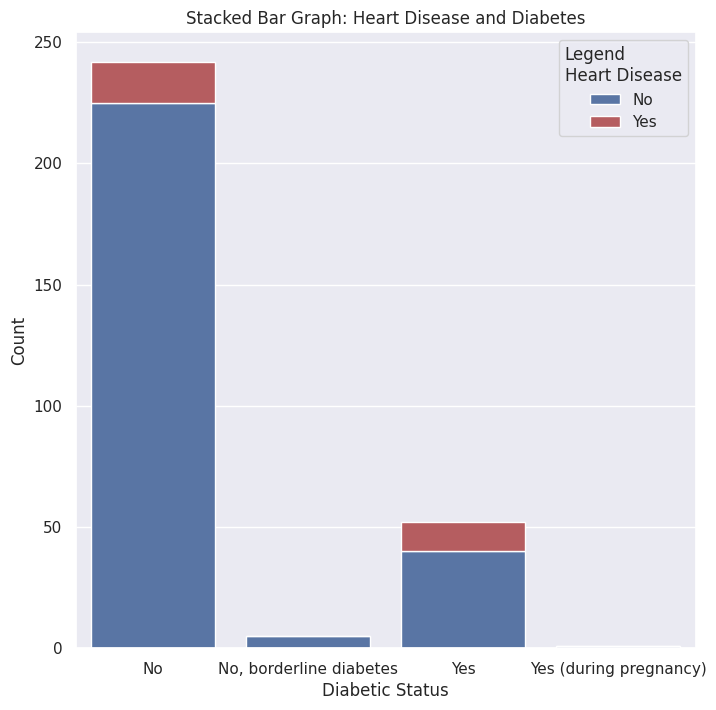

In [30]:

contingency_table = pd.crosstab(df['HeartDisease'], df['Diabetic'])

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

sns.barplot(x=contingency_table.columns, y=contingency_table.loc['No'], label='No', color='b')
sns.barplot(x=contingency_table.columns, y=contingency_table.loc['Yes'], bottom=contingency_table.loc['No'], label='Yes', color='r')

plt.title('Stacked Bar Graph: Heart Disease and Diabetes')
plt.xlabel('Diabetic Status')
plt.ylabel('Count')
plt.legend(title='Legend'+ '\n' +'Heart Disease')

plt.show()


Sex           Female  Male
HeartDisease              
No               156   115
Yes               10    19

Chi-square Test Result:
Chi2: 4.751685885051124, p-value: 0.029269605083423016


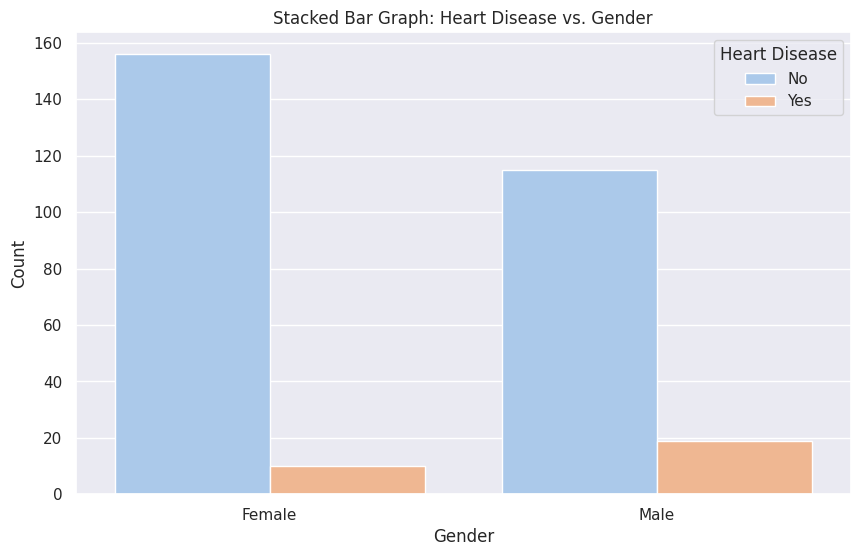

In [31]:


contingency_table_gender = pd.crosstab(df['HeartDisease'], df['Sex'])

print(contingency_table_gender)

chi2_gender, p_gender, _, _ = chi2_contingency(contingency_table_gender)

print("\nChi-square Test Result:")
print(f"Chi2: {chi2_gender}, p-value: {p_gender}")

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='pastel')

plt.title('Stacked Bar Graph: Heart Disease vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease')

plt.show()


In [32]:

contingency_table_activity = pd.crosstab(df['HeartDisease'], df['PhysicalActivity'])

print("Two-way Table:")
print(contingency_table_activity)

prob_heart_disease_given_activity = contingency_table_activity.loc['Yes', 'Yes'] / contingency_table_activity['Yes'].sum()

prob_heart_disease_without_activity = contingency_table_activity.loc['Yes', 'No'] / contingency_table_activity['No'].sum()

risk_reduction = prob_heart_disease_without_activity - prob_heart_disease_given_activity

print("\nProbability of heart disease doing physical activity:", prob_heart_disease_given_activity)
print("Probability of  heart disease without physical activity:", prob_heart_disease_without_activity)
print("Risk Reduction with Physical Activity:", risk_reduction)


Two-way Table:
PhysicalActivity  No  Yes
HeartDisease             
No                72  199
Yes               11   18

Probability of heart disease doing physical activity: 0.08294930875576037
Probability of  heart disease without physical activity: 0.13253012048192772
Risk Reduction with Physical Activity: 0.04958081172616735
